<a href="https://colab.research.google.com/github/orgoca/W207FinalProject/blob/main/project2EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 2 Baseline
Quora Project



# Load Data and Import Libraries

First, we load all data and necessary libraries. We split the `train` data into `miniTrain` and `miniTest` dataframes.



In [39]:
#Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, plot_confusion_matrix
from sklearn_pandas import DataFrameMapper
import csv
import random

In [40]:
# Code to read csv file from Google Drive into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [41]:
#Load test DF
testLink = 'https://drive.google.com/file/d/1chKVOcXwNzGRe_hRxpGlq18NVaSRM8X9/view?usp=sharing'
idTest = testLink.split('/')[-2]
downloaded = drive.CreateFile({'id':idTest}) 
downloaded.GetContentFile('test.csv')  
test = pd.read_csv('test.csv')

In [42]:
test

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [43]:
#Load train DF
trainLink = 'https://drive.google.com/file/d/1fP-AWiUGLjLkL0c_u67HOUFmHOMO7qm2/view?usp=sharing'
idTrain = trainLink.split('/')[-2]
downloaded = drive.CreateFile({'id':idTrain}) 
downloaded.GetContentFile('train.csv')  

In [44]:
train = pd.read_csv('train.csv')
train

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [45]:
#Split Training Data into MiniTrain and MiniTest (Test data has no labels so impossible to measure error from it)
# random.seed(10)
# miniTrain, miniDev, miniTest = train_test_split(train, test_size=0.2)

miniTrain, miniDev, miniTest = \
              np.split(train.sample(frac=1, random_state=42), 
                       [int(.8*len(train)), int(.9*len(train))])

miniTrain.to_csv('miniTrain.csv', index=False)

miniTest.to_csv('miniTest.csv', index=False)

miniDev.to_csv('miniDev.csv', index = False)

print("miniTrain: ",len(miniTrain), "observations, ", round(len(miniTrain)/len(train)*100,0), "%;\n" ,
      "miniDev: ",len(miniDev), "observations, ", round(len(miniDev)/len(train)*100,0), "%;\n" ,
      "miniTest: ",len(miniTest), "observations, ", round(len(miniTest)/len(train)*100,0), "%;" )

miniTrain:  1044897 observations,  80.0 %;
 miniDev:  130612 observations,  10.0 %;
 miniTest:  130613 observations,  10.0 %;


In [46]:
#Even with a seed the randomization is messing up predictions since miniTest will not find the same questions further down, 
#so rather load a static version from a csv instead.

miniTrain = pd.read_csv('miniTrain.csv')

miniTest = pd.read_csv('miniTest.csv')

miniDev = pd.read_csv('miniDev.csv')

# Vocabulary

Now we can instantiate a `CountVectorizer` to generate a vocabulary based on our `miniTrain` data.

In [47]:
#Create a vectorizer, create question and target lists, and vectorize questions
vectorizer = CountVectorizer()
trainQuestions = miniTrain.question_text.tolist()
testQuestions = miniTest.question_text.tolist()
trainLabels = miniTrain.target.tolist()
testLabels = miniTest.target.tolist()
vTrain = vectorizer.fit_transform(trainQuestions)
vTest = vectorizer.transform(testQuestions)

In [48]:
#What is the vocabulary size, and create a bag of words
print("vocab size: ", vTrain.shape)
bagOfWords = vectorizer.vocabulary_
len(bagOfWords)

vocab size:  (1044897, 173008)


173008

# Instantiate Linear Classifier

Now that we have a vectorizable vocabulary, we can apply a simple classifier to the problem.

For our baseline, we chose a simple logistic regression as our model with no preprocessing to our data. This is the simplest model that we could try to run a first pass of predictions which we will then use to measure performance increase over more sophisticated prediction techiniques (with feature engineering, data preprocessing and more complex algorythms and ensammble methods).  

In [49]:
#Create a logistic regression model and fit to train data
lr_clf = LogisticRegression(C=1, max_iter=1000)
lr_clf.fit(vTrain, trainLabels)

train_predict = lr_clf.predict(vTrain)
train_predict

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
lr_clf.predict_proba(vTrain)

array([[9.99445924e-01, 5.54076231e-04],
       [9.94171541e-01, 5.82845930e-03],
       [9.95886088e-01, 4.11391168e-03],
       ...,
       [9.99036297e-01, 9.63703347e-04],
       [9.97659414e-01, 2.34058616e-03],
       [9.98547236e-01, 1.45276395e-03]])

In [51]:
#Give this a try with your own questions, it's good fun!
#Try an insincere question. Insincere questions should get a higher probability score to legitimate questions.
testQuestionInsincere1 = "Why are Indians a superior race to Pakistanis?"

vdev = vectorizer.transform([testQuestionInsincere1.lower()])

lr_clf.predict_proba(vdev)[0][1]

0.9435451419342157

In [52]:
#Try a sincere question. Sincere questions should get a lower probability score ideally close to zero.
testQuestionInsincere2 = "What are the origins of the conflict between Indians and Pakistanis?"
vdev = vectorizer.transform([testQuestionInsincere2.lower()])

lr_clf.predict_proba(vdev)[0][1]

0.21645361378111908

In [53]:
testPredictProb = [i[1] for i in lr_clf.predict_proba(vTest)]
testPredict = lr_clf.predict(vTest)
columnNames = {'0':'qid', '1':'question_text', 'Unnamed 0': 'pred', '3': 'target'}
summaryDF = pd.DataFrame(data=[miniTest.qid,
                               miniTest.question_text, 
                               pd.Series(testPredictProb),
                               miniTest.target]) \
                               .T \
                               .rename(columns=columnNames)
summaryDF

,qid,question_text,pred,target
0,d022e5762b33db8623de,Where can I find best romantic shayaris?,0.00346049,1
1,55c730aea84c4c5258b7,When we check the UPSC rank list; many of the ...,0.00384274,0
2,ebc0e1725d36cd2fe80a,Is there is any web site to create search engi...,0.00325183,0
3,70df96e4827e97d60ee0,How can you earn $50 just clicking ads?,0.00256065,0
4,86200b47c08a80772133,Which 3 branches of engineering have the most ...,0.000198836,0
...,...,...,...,...
130608,1595cbbad9c20d3d791a,How can the ViewSonic PA503S 3600 lumens SVGA ...,0.0017457,0
130609,32b9bf37edd829ffe658,What are the biggest myths about Adolf Hitler?,0.0454919,0
130610,19d09fe4bbabf16eb347,What song played in the movie of the gifted wh...,0.00897491,0
130611,837181f0407fd112a05c,"What do Socrates, Thomas Kuhn and Karl Popper ...",0.00806443,0


In [54]:
#Why use 0.2 as a threshold for the LR prediction probability? 
#It yields the best F1 Score. Let's calculate it:

calcDF = summaryDF[['pred', 'target']]

def frange(start, stop, step):
  i = start
  while i < stop:
    yield i
    i += step

columnNames = ['threshold', 'f1Score', 'accuracy', 'recall', 'precision']
thresholdDF = pd.DataFrame(columns=columnNames)

for i in frange(0.05,1,0.05):
  calcDF['pred2'] = np.where(calcDF['pred'] > i, 1, 0)
  f1Score = f1_score(testLabels, calcDF.pred2)
  accuracy = accuracy_score(testLabels, calcDF.pred2)
  recall = recall_score(testLabels, calcDF.pred2)
  precision = precision_score(testLabels, calcDF.pred2)
  thresholdDF = thresholdDF.append({'threshold': i, 'f1Score': f1Score, 
                                    'accuracy':accuracy, 'recall':recall, 
                                    'precision':precision}, 
                                   ignore_index=True)

thresholdDF

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


,threshold,f1Score,accuracy,recall,precision
0,0.05,0.477622,0.877309,0.899116,0.325181
1,0.10,0.568470,0.922795,0.815169,0.436399
2,0.15,0.602110,0.938214,0.749386,0.503214
3,0.20,0.616717,0.945794,0.699067,0.551724
4,0.25,0.615331,0.949592,0.646294,0.587199
5,0.30,0.608016,0.951628,0.601375,0.614806
6,0.35,0.598628,0.952968,0.562224,0.640073
7,0.40,0.582124,0.953251,0.521969,0.657952
8,0.45,0.560539,0.953037,0.480118,0.673322
9,0.50,0.540282,0.952861,0.444035,0.689800


In [55]:
 #Find the optimum threshold and save it to variable to use further down creating predictions
 #Depending on the original random sample, optimum threshold will oscillate between 0.2 and 0.25
 
 optimumThreshold = thresholdDF.loc[thresholdDF['f1Score'].idxmax()][0]

 optimumThreshold

0.2

In [56]:
#I added this as using 0.2 as the treshold to predict insincere questions yield the optimum predictive power (measured by F1 score). 
#The standard testPredict computes with a different treshold (maybe 0.5?) and produces a lower F1 score and predictive power metrics overall

summaryDF['testPredict2'] = np.where(summaryDF['pred'] > optimumThreshold, 1, 0)

summaryDF

,qid,question_text,pred,target,testPredict2
0,d022e5762b33db8623de,Where can I find best romantic shayaris?,0.00346049,1,0
1,55c730aea84c4c5258b7,When we check the UPSC rank list; many of the ...,0.00384274,0,0
2,ebc0e1725d36cd2fe80a,Is there is any web site to create search engi...,0.00325183,0,0
3,70df96e4827e97d60ee0,How can you earn $50 just clicking ads?,0.00256065,0,0
4,86200b47c08a80772133,Which 3 branches of engineering have the most ...,0.000198836,0,0
...,...,...,...,...,...
130608,1595cbbad9c20d3d791a,How can the ViewSonic PA503S 3600 lumens SVGA ...,0.0017457,0,0
130609,32b9bf37edd829ffe658,What are the biggest myths about Adolf Hitler?,0.0454919,0,0
130610,19d09fe4bbabf16eb347,What song played in the movie of the gifted wh...,0.00897491,0,0
130611,837181f0407fd112a05c,"What do Socrates, Thomas Kuhn and Karl Popper ...",0.00806443,0,0


We use the F1 score as our target metric. The reason for choosing the F1 score is because the Kaggle competition uses that metric to compare and rank participants. By adhering to competition standards we'll be able to better assess our predictive power vs a universe of kaggle users that have participated in this competition. 

Accuracy: 0.9457940633780711
F1 score: 0.6167171935902988
Recall: 0.6990672557682867
Precision: 0.5517241379310345

 Clasification report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97    122465
           1       0.55      0.70      0.62      8148

    accuracy                           0.95    130613
   macro avg       0.77      0.83      0.79    130613
weighted avg       0.95      0.95      0.95    130613


 Confusion matrix:



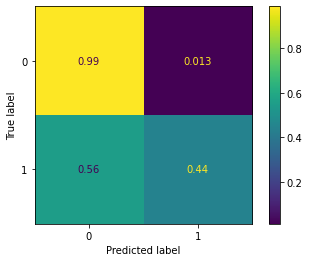

In [57]:
#Compute baseline F1 Score (and other metrics)

print('Accuracy:', accuracy_score(testLabels, summaryDF.testPredict2))
print('F1 score:', f1_score(testLabels, summaryDF.testPredict2))
print('Recall:', recall_score(testLabels, summaryDF.testPredict2))
print('Precision:', precision_score(testLabels, summaryDF.testPredict2))
print('\n Clasification report:\n', classification_report(testLabels, summaryDF.testPredict2))
print('\n Confusion matrix:\n')
disp = plot_confusion_matrix(lr_clf, vTest, testLabels, normalize='true')

# Brief Exploratory Data Analysis

Let's do a brief data eploratory analysis. Our main goal here is detecting whethere there are human observable patterns that the ML algorithms can pick up with more sofistication. To achieve this, we'll do word clouds for insincere questions (target == 1), and sincere questions (target == 0), and we'll also look at the top 50 words on each class. 

In [58]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.pyplot import figure
from collections import Counter
# importing NLTK libarary stopwords 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [59]:
insincereDF = train[train['target'] == 1]

sincereDF = train[train['target'] == 0]

There are 8005374 words in the combination of all review.


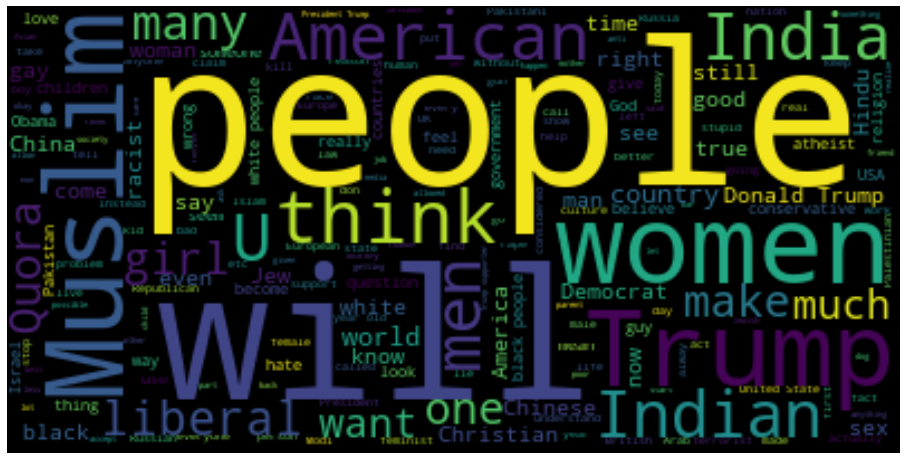

In [60]:
insincereQWords = " ".join(review for review in insincereDF.question_text)

print ("There are {} words in the combination of all review.".format(len(insincereQWords)))

# Generate a word cloud image
insincereWordCloud = WordCloud(background_color="black").generate(insincereQWords)

# Display the generated image:
figure(figsize=(16, 12))
plt.imshow(insincereWordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

There are 85615928 words in the combination of all review.


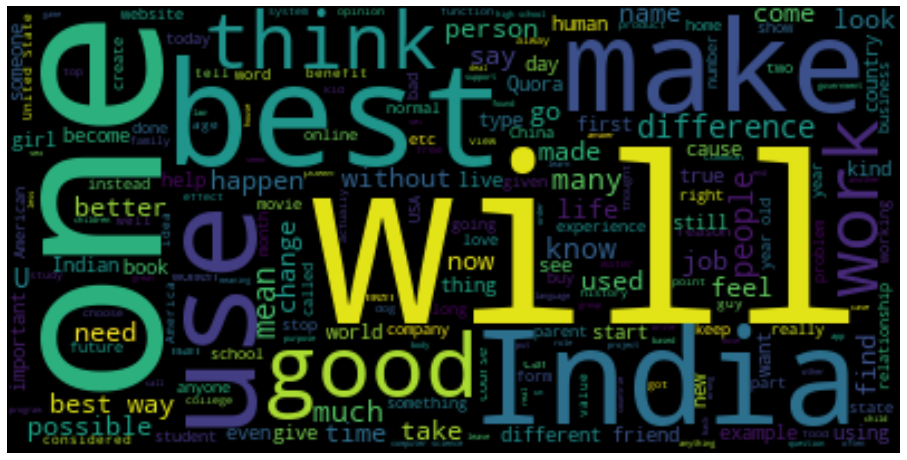

In [61]:
sincereQWords = " ".join(review for review in sincereDF.question_text)

print ("There are {} words in the combination of all review.".format(len(sincereQWords)))

# Generate a word cloud image
sincereWordCloud = WordCloud(background_color="black").generate(sincereQWords)

# Display the generated image:
figure(figsize=(16, 12))
plt.imshow(sincereWordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

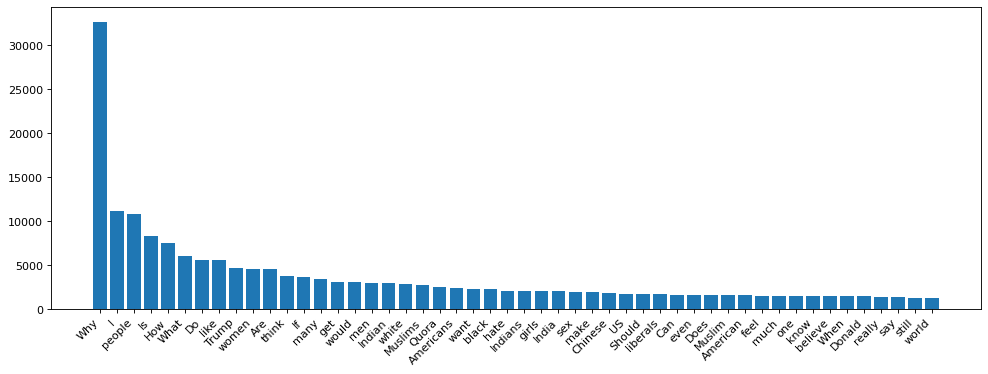

In [62]:
# split() returns list of all the words in the string
splitItInsincere = insincereQWords.split()
  
# Pass the split_it list to instance of Counter class.
counterInsincere = Counter(splitItInsincere)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
mostOccur = counterInsincere.most_common(1000)

#Create an empty list and append words that ARE NOT in the stop words list 
mostOccurNoStop = []

for item in mostOccur:
  if item[0] not in stopwords.words('english'):
    mostOccurNoStop.append(item)

insincereQs_df = pd.DataFrame(data=mostOccurNoStop, columns=['Word','Frequency'])
plt.figure(figsize=(15, 5), dpi=80)
plt.bar(insincereQs_df[:50].Word, insincereQs_df[:50].Frequency)
plt.xticks(rotation = 45, ha='right') # Rotates X-Axis Ticks by 45-degrees
plt.show()


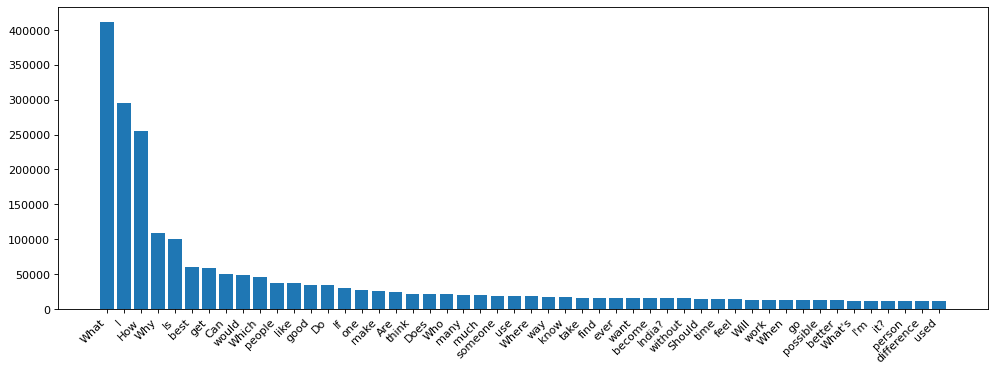

In [63]:
# split() returns list of all the words in the string
splitItSincere = sincereQWords.split()
  
# Pass the split_it list to instance of Counter class.
counterSincere = Counter(splitItSincere)
  
# most_common() produces k frequently encountered
# input values and their respective counts.
mostOccur = counterSincere.most_common(1000)
  
#Create an empty list and append words that ARE NOT in the stop words list
mostOccurNoStop = []

for item in mostOccur:
  if item[0] not in stopwords.words('english'):
    mostOccurNoStop.append(item)

sincereQs_df = pd.DataFrame(data=mostOccurNoStop, columns=['Word','Frequency'])
plt.figure(figsize=(15, 5), dpi=80)
plt.bar(sincereQs_df[:50].Word, sincereQs_df[:50].Frequency)
plt.xticks(rotation = 45, ha='right') # Rotates X-Axis Ticks by 45-degrees
plt.show()

### Exploratory Data Analysis Summary: 

There are definitive patterns that are observable by humans and that the ML algorithms can pick up and potentiate. 

If we look at the top 50 list and wordcloud for **insincere questions**, we'll find words that are closely related to people's anxieties and fears over immigration, gender and political affiliations (_e.g. Muslim, Indian, Men, Women, Mexican, Chinese, Girls, Liberals, etc._); we also find words associated to subjective language (_really, many, much_), as well as words that can be associated to incendiary rhetoric (_hate, make, feels_).

If we look at the top 50 list and wordcloud for **sincere questions**, we can't find the patterns described above. Instead, we find plenty of words with a positive connotation (_better, best, can_), and many neutral words (_person, difference, time, should, want, people, can how, why_). The subjective language pattern is also present here (_much, many_).